In [3]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d

from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC


import seaborn; seaborn.set()

In [9]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [10]:

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

[-1, 4, -2, 7]

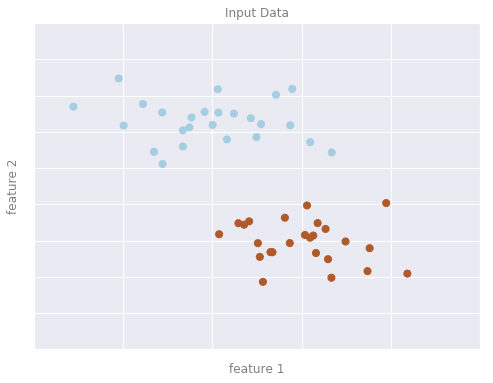

In [11]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])


[-1, 4, -2, 7]

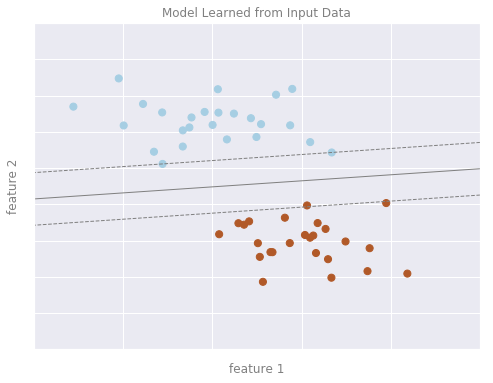

In [13]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])



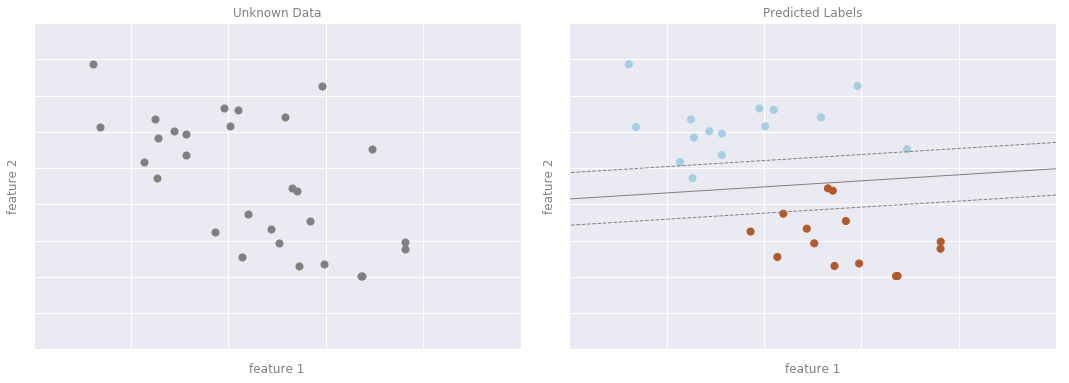

In [14]:

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')